# Mac Address Feature Cleaning

The notebook aims at understanding the mac addresses using a clustering algorithm (k-means) to determine whether the mac addresses are stationary or moving (shoppers).

In [105]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

In [2]:
%load_ext autoreload
%autoreload 2

## Import the data and create mac address data frame

In [3]:
mac_address_df = pd.read_csv('../data/mac_address_features.csv')

In [4]:
print('{} mac addresses'.format(len(mac_address_df)))

154152 mac addresses


In [5]:
mac_address_df.head()

,count,mac_address,manufacturer,gyration,cdv,length_of_stay,is_out_of_hours
0,6606,bc:20:10:8c:fe:05,NaN,10.848379,50.790938,86335,1
1,5718,98:fc:11:eb:90:65,"Cisco-Linksys, LLC",20.430586,26.874078,86335,1
2,5686,c4:f0:81:19:be:fc,"HUAWEI TECHNOLOGIES CO.,LTD",8.211081,45.712970,86284,1
3,5332,e8:de:27:5e:bf:99,"TP-LINK TECHNOLOGIES CO.,LTD.",47.177085,24.980181,86089,1
4,5281,9c:99:a0:07:5e:a9,Xiaomi Communications Co Ltd,9.771733,48.059259,86335,1


## Correlation Analysis

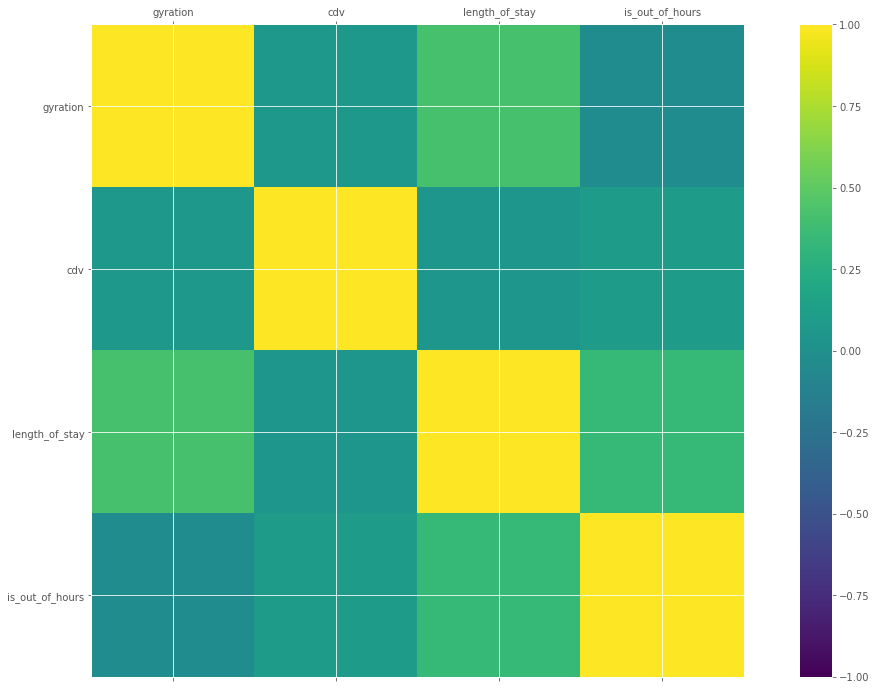

In [18]:
names = ['gyration', 'cdv', 'length_of_stay', 'is_out_of_hours']
correlations = mac_address_df[names].corr()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))
cax = axes.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
axes.set_xticks(ticks)
axes.set_yticks(ticks)
axes.set_xticklabels(names)
axes.set_yticklabels(names)
plt.show()

## Cluster Analysis

In [122]:
mac_address_clean_df = mac_address_df.dropna()

In [136]:
mac_address_clean_df['gyration'] = scale(mac_address_clean_df['gyration'])
mac_address_clean_df['cdv'] = scale(mac_address_clean_df['cdv'])
mac_address_clean_df['length_of_stay'] = scale(mac_address_clean_df['length_of_stay'])
mac_address_clean_df['is_out_of_hours'][mac_address_clean_df['is_out_of_hours'] == 0] = -1
mac_address_clean_df['is_out_of_hours'] = mac_address_clean_df['is_out_of_hours'] * 2

c:\users\tvb\envs\venv-msci2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\tvb\envs\venv-msci2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\tvb\envs\venv-msci2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [137]:
samples = mac_address_clean_df.as_matrix(columns=['gyration', 'cdv', 'length_of_stay', 'is_out_of_hours'])

In [116]:
samples = scale(samples)

In [138]:
n_clusters = 2

model = KMeans(n_clusters=n_clusters)
model.fit(samples)
labels = model.predict(samples)

In [ ]:
silhouette_avg = silhouette_score(samples, labels)
print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

In [99]:
mac_address_clean_df['cluster'] = labels

c:\users\tvb\envs\venv-msci2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


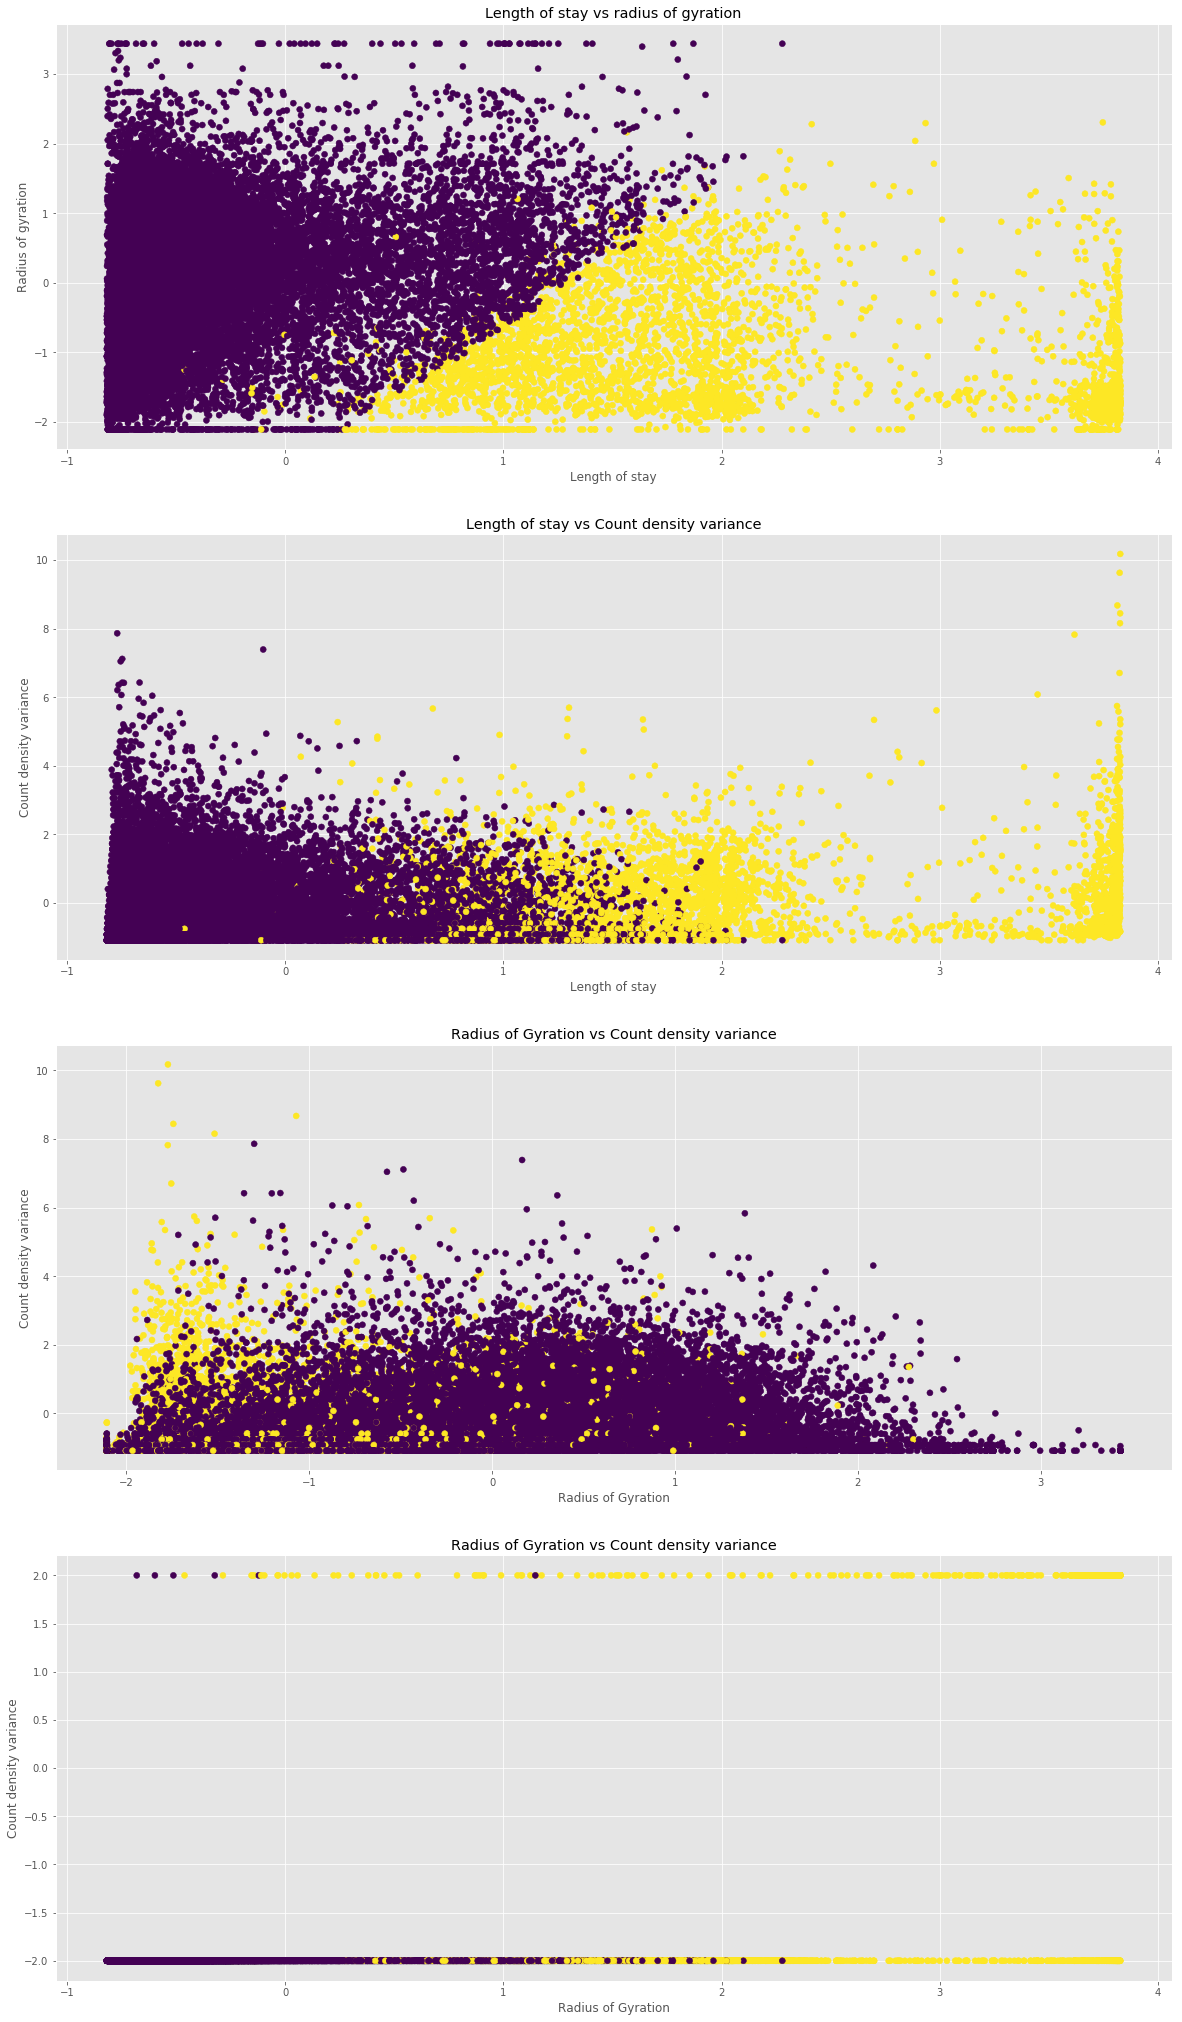

In [139]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 36))

xs = samples[:,2]
ys = samples[:,0]

axes[0].scatter(xs, ys, c=labels)
axes[0].set_title('Length of stay vs radius of gyration')
axes[0].set_xlabel('Length of stay')
axes[0].set_ylabel('Radius of gyration');

xs = samples[:,2]
ys = samples[:,1]

axes[1].scatter(xs, ys, c=labels)
axes[1].set_title('Length of stay vs Count density variance')
axes[1].set_xlabel('Length of stay')
axes[1].set_ylabel('Count density variance');

xs = samples[:,0]
ys = samples[:,1]

axes[2].scatter(xs, ys, c=labels)
axes[2].set_title('Radius of Gyration vs Count density variance')
axes[2].set_xlabel('Radius of Gyration')
axes[2].set_ylabel('Count density variance');

xs = samples[:,2]
ys = samples[:,3]

axes[3].scatter(xs, ys, c=labels)
axes[3].set_title('Radius of Gyration vs Count density variance')
axes[3].set_xlabel('Radius of Gyration')
axes[3].set_ylabel('Count density variance');

In [ ]:
mac_address_clean_df.cluster.value_counts()